In [47]:
%load_ext autoreload
%autoreload 2
import fastf1
import pandas as pd
from f1analytics.vizHelper import vizTemplates
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
monacogp_q=fastf1.get_session(2024,'monaco','q')
monacogp_r=fastf1.get_session(2024,'monaco','r')

monacogp_q.load()
monacogp_r.load()

req         WARNING 	DEFAULT CACHE ENABLED! (894.42 MB) /Users/nendra/Library/Caches/fastf1
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INF

In [7]:
monacogp_qViz=vizTemplates.vizDataQuali(monacogp_q)
monacogp_rViz=vizTemplates.vizDataRace(monacogp_r)

getting and enriching fastest laps telemetry...
getting and enriching all laps telemetry...
getting and enriching fastest laps telemetry...


/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/fastf1/core.py:306

getting and enriching all laps telemetry...


/Users/nendra/f1analytics/src/f1analytics/vizHelper/vizTemplates.py:321: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  tyreAlphas = pd.concat(


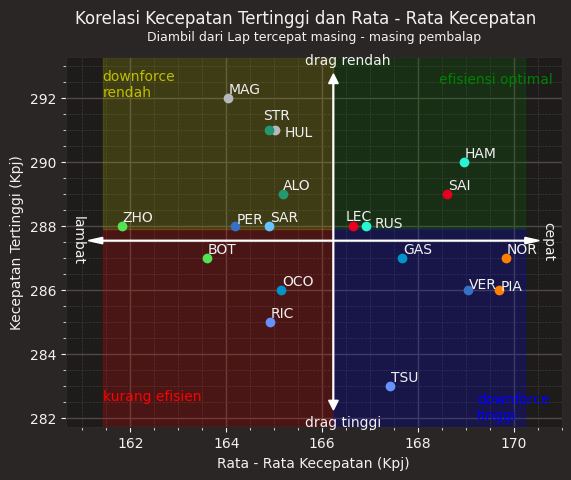

In [8]:
monacogp_qViz.quadrantAnalysis()

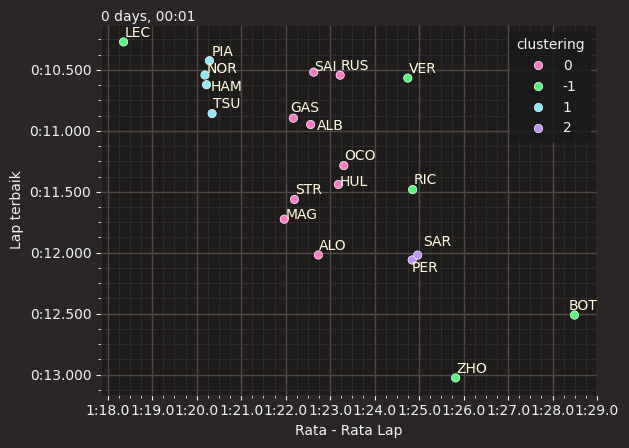

In [29]:
monacogp_qViz.clusterAnalysis(mode='avg',min_samp=2,epsVar=0.6)

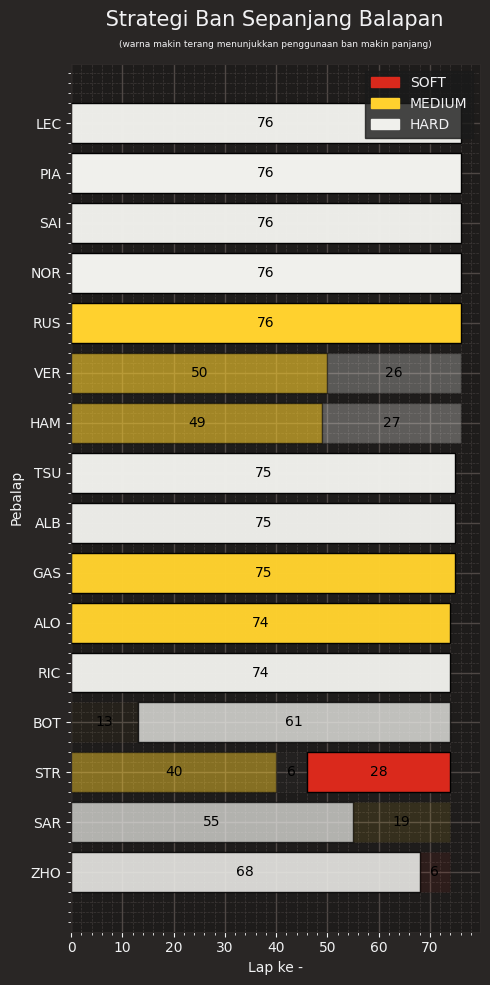

In [10]:
monacogp_rViz.TyreStrats()

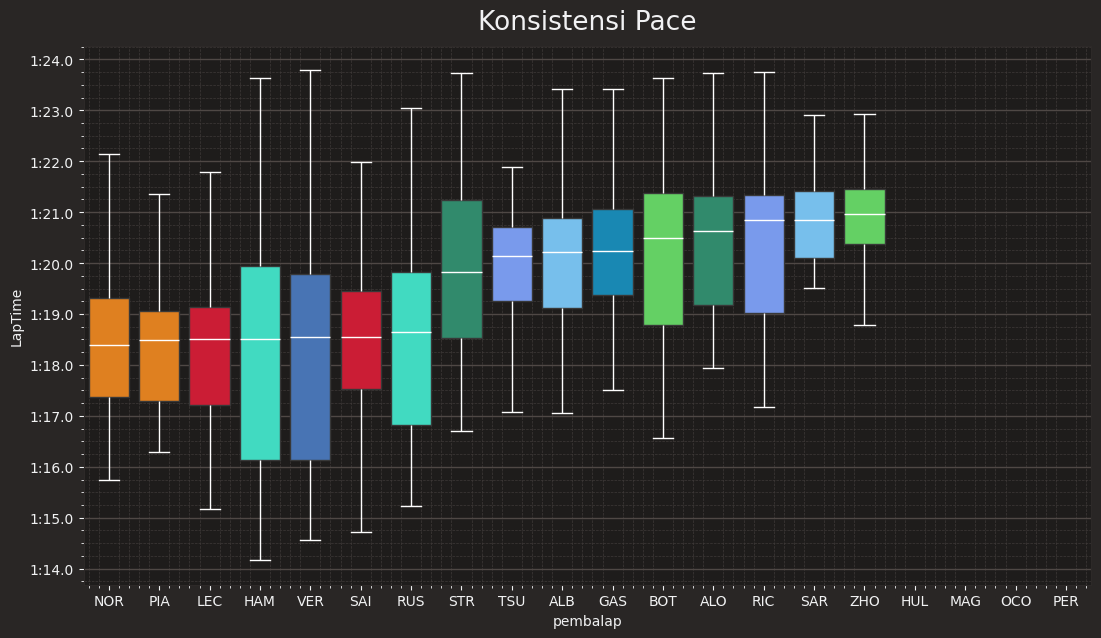

In [30]:
monacogp_rViz.BoxPlot()

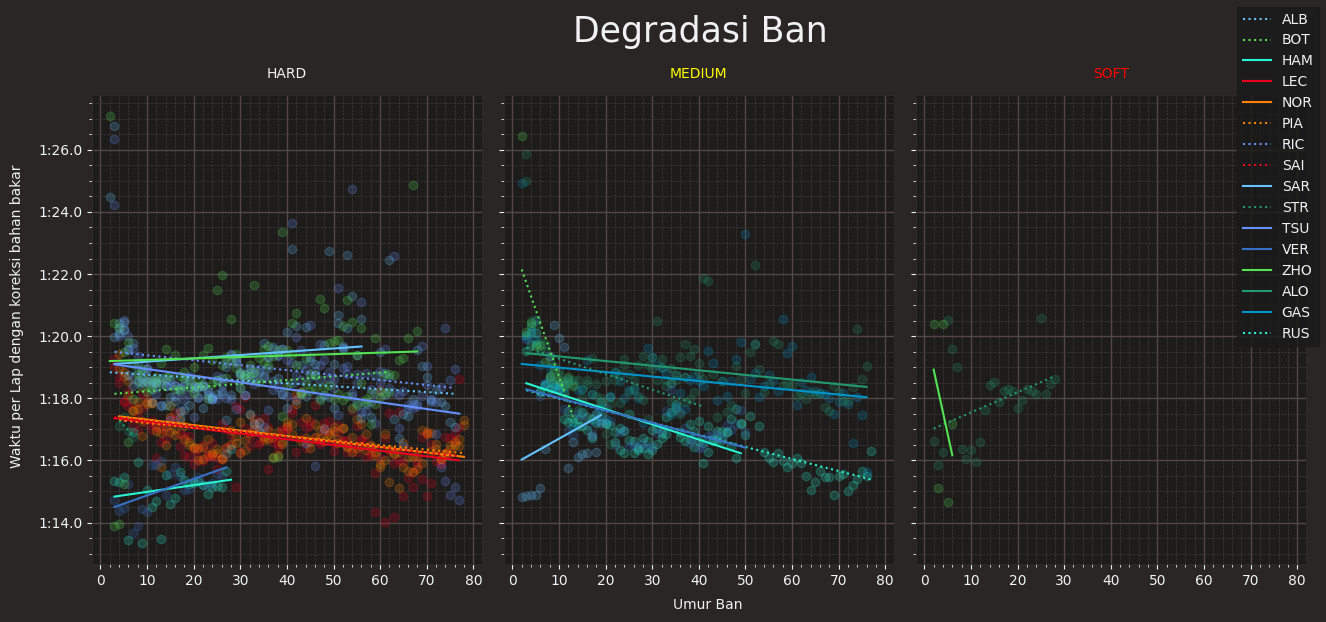

In [11]:
monacogp_rViz.TyreDeg()

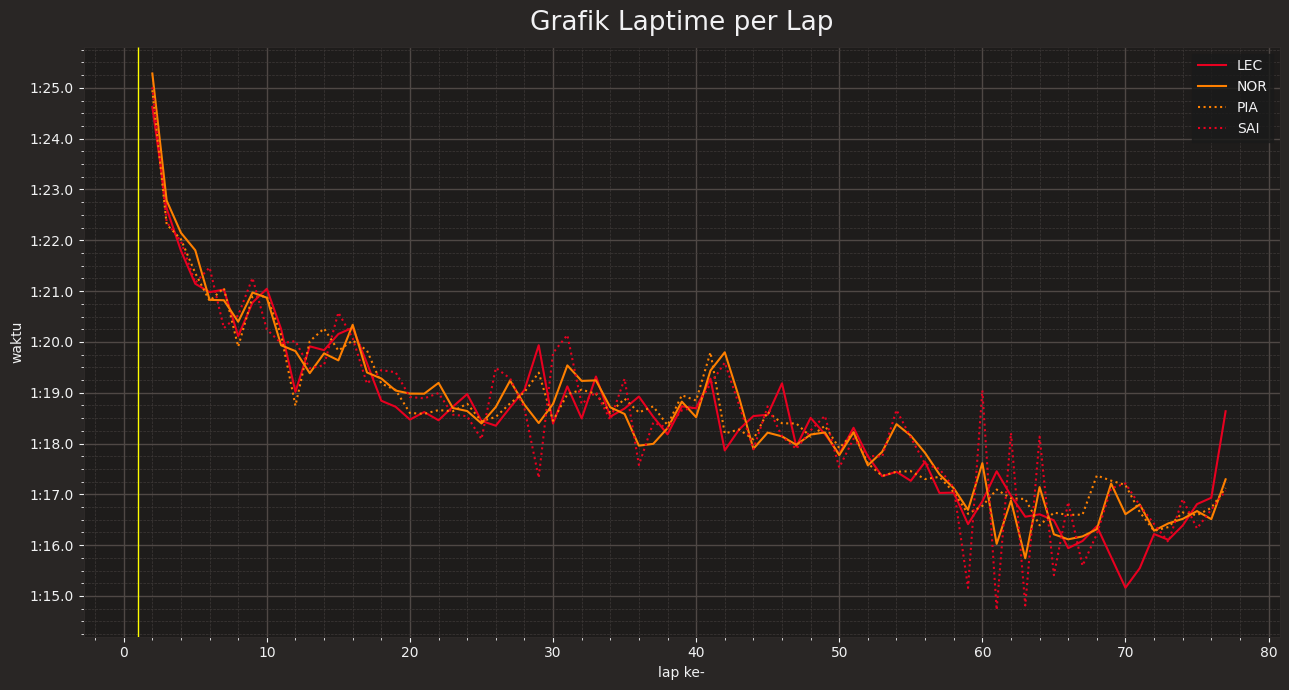

In [36]:
monacogp_rViz.LinePlot(['LEC','PIA','SAI','NOR'],28)

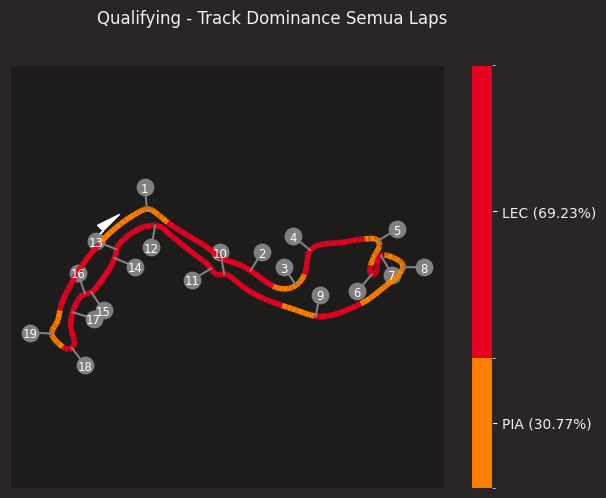

In [40]:
monacogp_qViz.trackDominance(drvList=['LEC','PIA'],mode='average')

/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nendra/f1analytics/.venv/

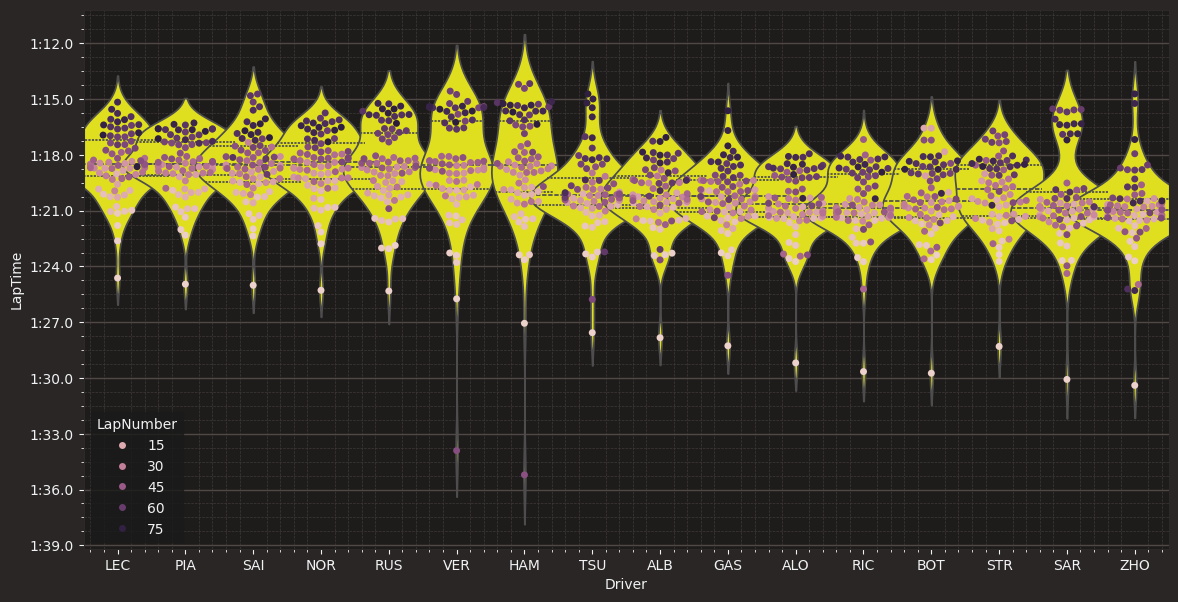

In [44]:
monacogp_rViz.violin()

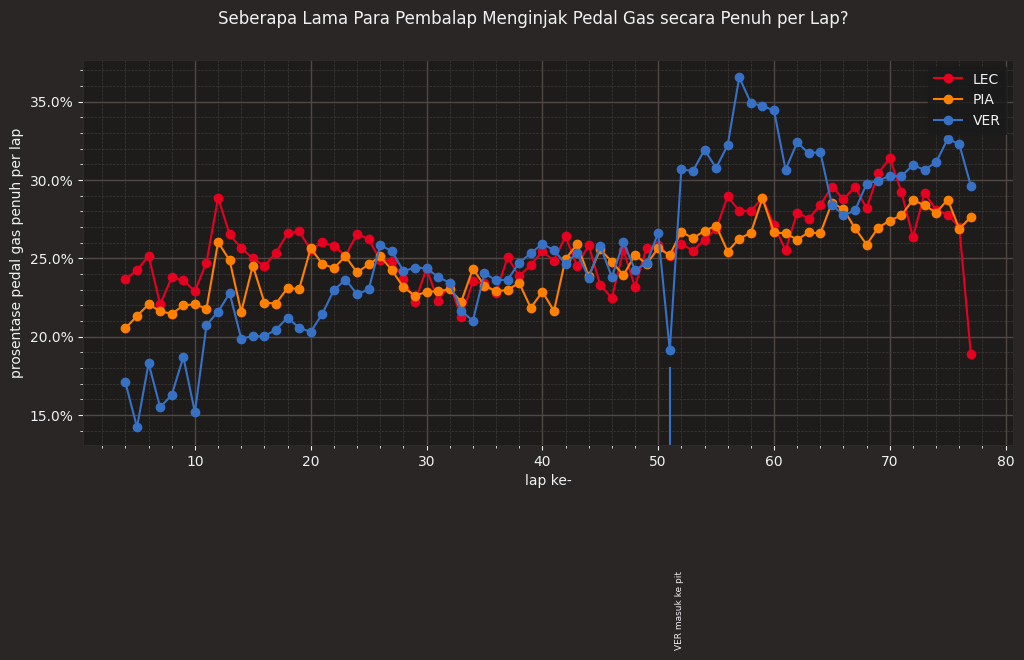

In [45]:
monacogp_rViz.ThrottleViz(['LEC','PIA','VER'])

/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


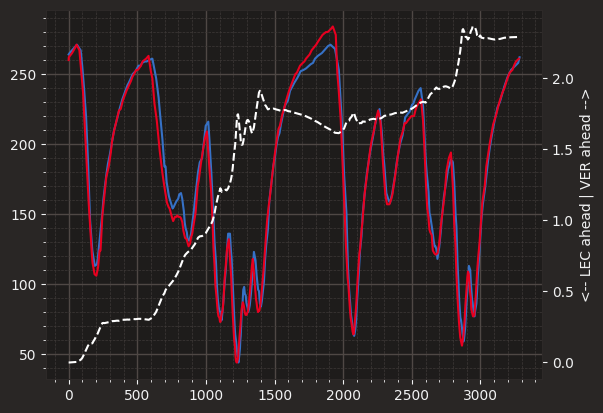

In [50]:
dt,ref,com=fastf1.utils.delta_time(monacogp_r.laps.pick_laps(58).pick_driver('VER'),monacogp_r.laps.pick_laps(58).pick_driver('LEC'))
fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref['Distance'], ref['Speed'],
        color='#'+monacogp_r.get_driver('VER').TeamColor)
ax.plot(com['Distance'], com['Speed'],
        color='#'+monacogp_r.get_driver('LEC').TeamColor)

twin = ax.twinx()
twin.plot(ref['Distance'], dt, '--', color='white')
twin.set_ylabel("<-- LEC ahead | VER ahead -->")
plt.show()